MMR改の説明を作る必要がある

# 12/15ゼミ

MMR-analysisの結果から明らかなように，提案手法では最適化の過程である特定の位置に「重み」が集中し，それ以外の場所は極端に小さな重みを取るというアンバランスが発生した．
この状況を改善するために，以下のように「区間重要度幅に対する重み（比率）」の最小化を図る

**Phase 1**  
区間重要度の中心を各手法で推定  
* $k$ 番目を除いた $n-1$ 個の $w_i$ に対して EV, GM, ALD で $w_{i}^{C}(k)$ を求める（この時点でそれらの総和は１となる）
* 上記で求めた $w_{i}^{C}(k)$ の和を $\mu_k$ 倍することで、 $k$ 番目の区間重要度中心は $1-\mu_k$ となる

**Phase 2【非線形】**  
各 $k$ に対して以下の最適化問題を解き，最適値を $d_{\overline{k}}^{*}$ とする：  
（目的関数を重みと幅の比で扱うために，これまでの各式に対して，$\dfrac{1}{\mu}$ 倍している）  
$$
\begin{align*}
\operatorname{minimize} ~~ & ~~

d_{\overline{k}} = \sum_{j \in N \backslash k} \frac{l_j}{\mu}, \\
\text{subject to} ~~ & ~~

a_{ij} \left( w_{j}^{C} - \frac{l_j}{\mu} \right) \leq w_{i}^{C} + \frac{l_i}{\mu}, &&
i \neq j, k, ~~ & j \neq k \\ & ~~

a_{kj} \left( w_{j}^{C} - \frac{l_j}{\mu} \right) \leq \frac{1-\mu}{\mu} + \frac{l_k}{\mu}, &&
j \neq k \\ & ~~

a_{ik} \left(\frac{1-\mu}{\mu} - \frac{l_k}{\mu} \right) \leq w_{i}^{C} + \frac{l_i}{\mu}, &&
i \neq k \\ & ~~

\frac{1-\mu}{\mu} + \frac{l_k}{\mu} + \sum_{i \in N \backslash \left\{ j, k \right\} } \left( w_{i}^{C} + \frac{l_i}{\mu} \right) + w_{j}^{C} - \frac{l_j}{\mu} \geq \frac{1}{\mu}, &&
i \in N \backslash k \\ & ~~

\frac{1-\mu}{\mu} - \frac{l_k}{\mu} + \sum_{i \in N \backslash \left\{ j, k \right\} } \left( w_{i}^{C} - \frac{l_i}{\mu} \right) + w_{j}^{C} + \frac{l_j}{\mu} \leq \frac{1}{\mu}, &&
i \in N \backslash k \\ & ~~

\sum_{i \in N \backslash k} \left( w_{i}^{C} + \frac{l_i}{\mu} \right) + \frac{1-\mu}{\mu} - \frac{l_k}{\mu} \geq \frac{1}{\mu} \\ & ~~

\sum_{i \in N \backslash k} \left( w_{i}^{C} - \frac{l_i}{\mu} \right) + \frac{1-\mu}{\mu} + \frac{l_k}{\mu} \leq \frac{1}{\mu} \\ & ~~

w_{i}^{C} - \frac{l_i}{\mu} \geq \frac{\epsilon}{\mu}, &&
i \in N, ~~ & i \neq k \\ & ~~

\frac{1-\mu}{\mu} - \frac{l_k}{\mu} \geq \frac{\epsilon}{\mu} \\ & ~~


\end{align*}
$$



ただし，この問題は非線形最適化問題となるため，  
$\dfrac{l_i}{\mu} = L_i, ~~ \dfrac{1}{\mu} = t$  
と置き換えることで線形最適化問題に持ち込む：

**Phase 2' 【線形】**  
各 $k$ に対して、以下の線形最適化問題を解き、最適値を $d_{\overline{k}}^{*}$ とする：  
$$
\begin{align*}
\operatorname{minimize} ~~ & ~~

d_{\overline{k}} = \sum_{j \in N \backslash k} L_j, \\
\text{subject to} ~~ & ~~

a_{ij} \left( w_{j}^{C} - L_j \right) \leq w_{i}^{C} + L_i, &&
i \neq j, k, ~~ & j \neq k \\ & ~~

a_{kj} \left( w_{j}^{C} - L_j \right) \leq t-1 + L_k, &&
j \neq k \\ & ~~

a_{ik} \left\{ \left( t -1 \right) - L_k \right\} \leq w_{i}^{C} + L_i, &&
i \neq k \\ & ~~

\left( t-1 \right) + L_k + \sum_{i \in N \backslash \left\{ j, k \right\} } \left( w_{i}^{C} + L_i \right) + w_{j}^{C} - L_j \geq t, &&
i \in N \backslash k \\ & ~~

\left( t-1 \right) - L_k + \sum_{i \in N \backslash \left\{ j, k \right\} } \left( w_{i}^{C} - L_i \right) + w_{j}^{C} + L_j \leq t, &&
i \in N \backslash k \\ & ~~

\sum_{i \in N \backslash k} \left( w_{i}^{C} + L_i \right) + \left( t-1 \right) - L_k \geq t \\ & ~~

\sum_{i \in N \backslash k} \left( w_{i}^{C} - L_i \right) + \left( t-1 \right) + L_k \leq t \\ & ~~

w_{i}^{C} - L_i \geq \epsilon , &&
i \in N, ~~ & i \neq k \\ & ~~

\left( t-1 \right) - L_k \geq \epsilon \\ & ~~


\end{align*}
$$


**Phase 3【非線形】**  
各 $k$ に対して、以下の線形最適化問題を解き、最適値を $l_{k}^{*}$ とする：  
（目的関数を重みと幅の比で扱うために，これまでの各式に対して，$\dfrac{1}{1-\mu}$ 倍している）  
$$
\begin{align*}
\operatorname{minimize} ~~ & ~~
\frac{l_k}{1-\mu} \\
\text{subject to} ~~ & ~~

a_{ij} \left( \frac{\mu}{1-\mu} w_{j}^{C} - \frac{l_j}{1-\mu} \right) \leq \frac{\mu}{1-\mu} w_{i}^{C} + \frac{l_i}{1-\mu}, &&
i \neq j, k, ~~ & j \neq k \\ & ~~

a_{kj} \left( \frac{\mu}{1-\mu} w_{j}^{C} - \frac{l_j}{1-\mu} \right) \leq 1 + \frac{l_k}{1-\mu}, &&
j \neq k \\ & ~~

a_{ik} \left( 1 - l_k \right) \leq \frac{\mu}{1-\mu} w_{i}^{C} + \frac{l_i}{1-\mu}, &&
i \neq k \\ & ~~

1 + \frac{l_k}{1-\mu} + \sum_{i \in N \backslash \left\{ j, k \right\} } \left( \frac{\mu}{1-\mu} w_{i}^{C} + \frac{l_i}{1-\mu} \right) + \frac{\mu}{1-\mu} w_{j}^{C} - \frac{l_j}{1-\mu} \geq \frac{1}{1-\mu}, &&
i \in N \backslash k \\ & ~~

1 - \frac{l_k}{1-\mu} + \sum_{i \in N \backslash \left\{ j, k \right\} } \left( \frac{\mu}{1-\mu} w_{i}^{C} - \frac{l_i}{1-\mu} \right) + \frac{\mu}{1-\mu} w_{j}^{C} + \frac{l_j}{1-\mu} \leq \frac{1}{1-\mu}, &&
i \in N \backslash k \\ & ~~

\sum_{i \in N \backslash k} \left( \frac{\mu}{1-\mu} w_{i}^{C} + \frac{l_i}{1-\mu} \right) + 1 - \frac{l_k}{1-\mu} \geq \frac{1}{1-\mu} \\ & ~~

\sum_{i \in N \backslash k} \left( \frac{\mu}{1-\mu} w_{i}^{C} - \frac{l_i}{1-\mu} \right) + 1 + \frac{l_k}{1-\mu} \leq \frac{1}{1-\mu} \\ & ~~

\sum_{j \in N \backslash k} \frac{l_j}{1-\mu} = \frac{\mu}{1-\mu} d_{\overline{k}}^{*}\\ & ~~

\frac{\mu}{1-\mu} w_{i}^{C} - \frac{l_i}{1-\mu} \geq \epsilon, &&
i \in N \backslash k ~~ & \\ & ~~

1 - \frac{l_k}{1-\mu} \geq \epsilon \\ & ~~


\end{align*}
$$

ただし，この問題は非線形最適化問題となるため，  
$\dfrac{l_i}{1-\mu} = L'_i, ~~ \dfrac{1}{1-\mu} = t'$  
と置き換えることで線形最適化問題に持ち込む：

**Phase 3'【線形】**  
各 $k$ に対して、以下の線形最適化問題を解き、最適値を $l_{k}^{*}$ とする：  
$$
\begin{align*}
\operatorname{minimize} ~~ & ~~
L'_k \\
\text{subject to} ~~ & ~~
a_{ij} \left\{ \left( t'-1 \right) w_{j}^{C} - L'_j \right\} \leq \left( t'-1 \right) w_{i}^{C} + L'_i, &&
i \neq j, k, ~~ & j \neq k \\ & ~~

a_{kj} \left\{ \left( t'-1 \right) w_{j}^{C} - L'_j \right\} \leq 1 + L'_k, &&
j \neq k \\ & ~~

a_{ik} \left(1 - L'_k \right) \leq \left( t'-1 \right) w_{i}^{C} + L'_i, &&
i \neq k \\ & ~~

1 + L'_k + \sum_{i \in N \backslash \left\{ j, k \right\} } \left\{ \left( t'-1 \right) w_{i}^{C} + L'_i \right\} + \left( t'-1 \right) w_{j}^{C} - L'_j \geq t', &&
i \in N \backslash k \\ & ~~

1 - L'_k + \sum_{i \in N \backslash \left\{ j, k \right\} } \left\{ \left( t'-1 \right) w_{i}^{C} - L'_i \right\} + \left( t'-1 \right) w_{j}^{C} + L'_j \leq t', &&
i \in N \backslash k \\ & ~~

\sum_{i \in N \backslash k} \left\{ \left( t'-1 \right) w_{i}^{C} + L'_i \right\} + 1 - L'_k \geq t' \\ & ~~

\sum_{i \in N \backslash k} \left\{ \left( t'-1 \right) w_{i}^{C} - L'_i \right\} + 1 + L'_k \leq t' \\ & ~~

\sum_{j \in N \backslash k} L'_j = \left( t'-1 \right) d_{\overline{k}}^{*}\\ & ~~

\left( t'-1 \right) w_{i}^{C} - L'_i \geq t \epsilon, &&
i \in N \backslash k ~~ & \\ & ~~

1 - L'_k \geq t \epsilon \\ & ~~


\end{align*}
$$

**Phase 4**  
Phase 3 で導かれた結果は各$k$に対して存在するから、以下のようにして結果を統合する：  
* 各$l_{k}^{*}$に対して、  
$$\left\{\begin{array}{l}w_i(k)=\left[\mu_{k}^* w_i^c-l_{k}^{*},\:\: \mu_{k}^* w_i^c+l_{k}^{*}\right], \quad i \neq k \\ w_i(k)=\left[\left(1-\mu_{k}^*\right)-l_{k}^{*},\:\:\left(1-\mu_{k}^*\right)+l_{k}^{*}\right], \quad i=k\end{array}\right.$$
  

$$\overline{w}_i^L=\min _{k \in N} w_i^L(k) \quad \overline{w}_i^U=\max _{k \in N} w_i^U(k)$$  
  
ここで、$\overline{w}_i^L$ と $\overline{w}_i^U$ の中心 $\overline{w}_i^C$の総和が1となるように正規化する：
  
$$\overline{\overline{w}}_i^L=\frac{\overline{w}_i^L}{\sum_{i \in N} \frac{\overline{w}_i^L+\overline{w}_i^U}{2}} \quad \overline{\overline{w}}_i^U=\frac{\overline{w}_i^U}{\sum_{i \in N} \frac{\overline{w}_i^L+\overline{w}_i^U}{2}}$$
  

In [1]:
using LaTeXStrings
# using IntervalSets
using Plots

include("./libs/display-latex.jl")
include("./libs/crisp-pcm.jl")
include("./libs/solve-deterministic-ahp.jl")
include("./libs/MMR-kai.jl")
include("./libs/MMR3.jl")

MMR (generic function with 1 method)

In [2]:
# 完全整合
# A = [
#     1 1 1 1
#     1 1 1 1
#     1 1 1 1
#     1 1 1 1.0
# ]
# A = [
#     1   3   5   7
#     1/3 1   5/3 7/3
#     1/5 3/5 1   7/5
#     1/7 3/7 5/7 1
# ]
# A = [
#     1 1 1/3
#     1 1 1/3
#     3 3 1
# ]

# CI = 0.01
# A = [
#     1 2 4/3 4/3
#     1/2 1 1 1
#     3/4 1 1 3/2
#     3/4 1 2/3 1.0
# ]
# A = [
#     1 1 2/3 1
#     1 1 4/9 2/3
#     3/2 9/4 1 1
#     1 3/2 1 1.0
# ]

# CI = 0.15
# A = [
#     1 1 2 2
#     1 1 3 1
#     1/2 1/3 1 3
#     1/2 1 1/3 1
# ]

# エラーケース EVでダメなやつ
# A = [
#     1.0  1.0  2.0  3.0  3.0
#     1.0  1.0  2.0  3.0  5.0
#     1/2  1/2  1.0  1.0  3.0
#     1/3  1/3  1.0  1.0  2.0
#     1/3  1/5  1/3  1/2  1.0
# ]

# エラーケース GMでダメなやつ
# A = [
#     1.0  1.0  2.0  3.0  8.0
#     1.0  1.0  2.0  2.0  3.0
#     1/2  1/2  1.0  2.0  6.0
#     1/3  1/2  1/2  1.0  5.0
#     1/8  1/3  1/6  1/5  1.0
# ]

# エラーケース ADでダメなやつ
# A = [
#     1.0  2.0   2.0   3.0   2.0
#     1/2  1.0   1.0   2.0   4.0
#     1/2  1.0   1.0   1.0   4.0
#     1/3  1/2   1.0   1.0   4.0
#     1/2  1/4  1/4  1/4  1.0
# ]

# エラーケース ADでダメなやつ
# 分数表記はOK
# A = [
#     1.0 1.0 2.0 3.0 6.0
#     1.0 1.0 2.0 2.0 6.0
#     1/2 1/2 1.0 1.0 5.0
#     1/3 1/2 1.0 1.0 1.0
#     1/6 1/6 1/5 1.0 1.0
# ]

# 実数表記はNG
# A = [
#     1.000000 1.000000 2.000000 3.000000 6.000000
#     1.000000 1.000000 2.000000 2.000000 6.000000
#     0.500000 0.500000 1.000000 1.000000 5.000000
#     0.333333 0.500000 1.000000 1.000000 1.000000
#     0.166667 0.166667 0.200000 1.000000 1.000000
# ]

A = [
    1 2 2 2
    1/2 1 1 1
    1/2 1 1 1
    1/2 1 1 1
]

# A = [
#     1.000000 1.000000 1.000000 1.000000 3.000000 3.000000
#     1.000000 1.000000 1.000000 1.000000 3.000000 4.000000
#     1.000000 1.000000 1.000000 2.000000 1.000000 4.000000
#     1.000000 1.000000 0.500000 1.000000 2.000000 2.000000
#     0.333333 0.333333 1.000000 0.500000 1.000000 1.000000
#     0.333333 0.250000 0.250000 0.500000 1.000000 1.000000
# ]

display(L"A = %$(matrixLaTeXString(A))")

L"$A = \begin{pmatrix} 1.0 & 2.0 & 2.0 & 2.0 \\0.5 & 1.0 & 1.0 & 1.0 \\0.5 & 1.0 & 1.0 & 1.0 \\0.5 & 1.0 & 1.0 & 1.0 \\ \end{pmatrix}$"

In [3]:
solution1 = MMR(A, EV)
W1 = solution1.W
s1 = solution1.s
centers1 = solution1.centers
l1 = solution1.l
display(L"MMR_E = %$(intervalVectorLaTeXString(W1))")

L"$MMR_E = \begin{pmatrix} \left[ 0.4, 0.4 \right] \\ \left[ 0.2, 0.2 \right] \\ \left[ 0.2, 0.2 \right] \\ \left[ 0.2, 0.2 \right] \end{pmatrix}$"

In [4]:
solution2 = MMR_kai(A, EV)
s2 = solution2.s
centers2 = solution2.centers
l2 = solution2.l
W2 = solution2.W
display(L"MMR_E^{'} = %$(intervalVectorLaTeXString(W2))")


L"$MMR_E^{'} = \begin{pmatrix} \left[ 0.4, 0.4 \right] \\ \left[ 0.2, 0.2 \right] \\ \left[ 0.2, 0.2 \right] \\ \left[ 0.2, 0.2 \right] \end{pmatrix}$"

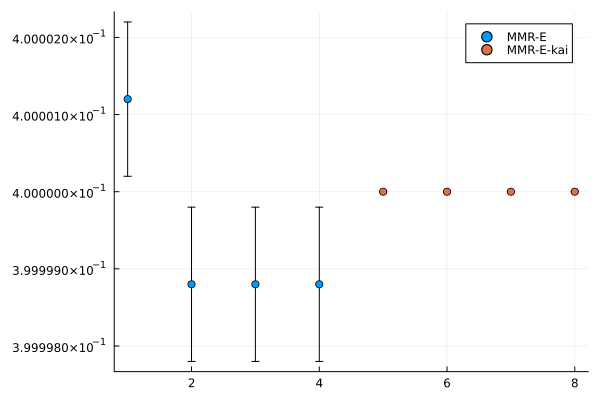

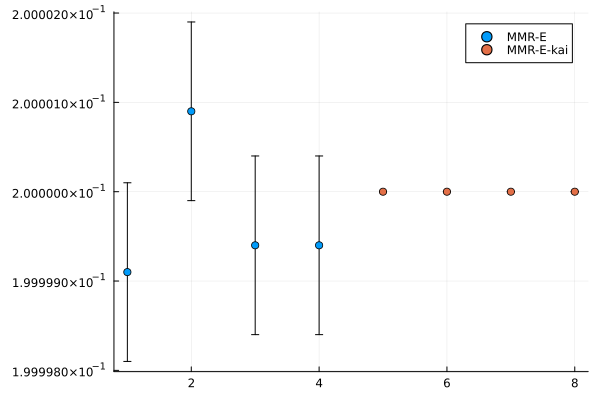

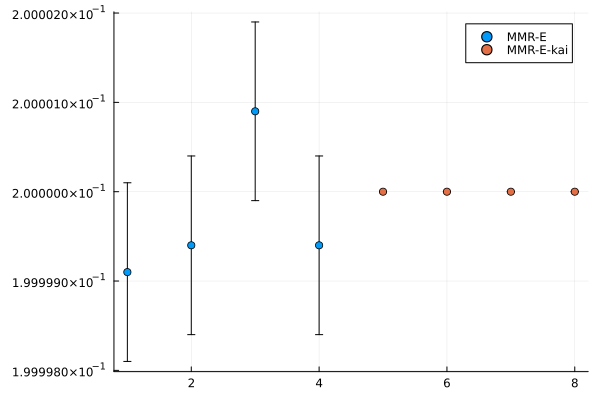

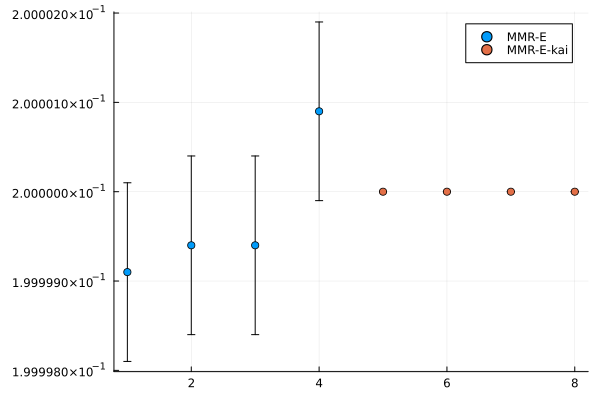

In [5]:

m, n = size(A)
# plot_obj = plot()

for i in 1:n
    plot_obj = plot()
    x = 1:n
    y = centers1[i, :]/s1
    e = l1[i, :]/s1
    plot!(x, y, grid=true, yerror=e, st=:scatter, label = "MMR-E")
    x = n+1:n*2
    y = centers2[i, :]/s2
    e = l2[i, :]/s2
    plot!(x, y, grid=true, yerror=e, st=:scatter, label = "MMR-E-kai")
    display(plot_obj)
end
